In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ImageProcessingPipeline import grayscale, binarize, gaussian, blur, laplacian, svd_compress

plt.rcParams['image.cmap'] = 'gray'

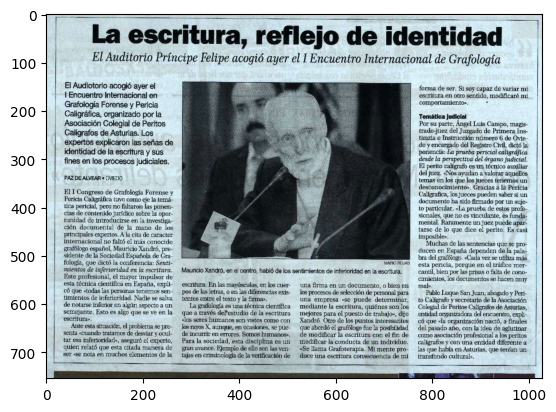

In [11]:
original_image = cv2.imread("../../data/images/diario2.png")
plt.imshow(original_image)

In [43]:
# Esto hace las mismas transformaciones que en el script original pero resumidas
# Para mas informacion, leer ImageProcessingPipeline.py jaajaj
image = original_image.copy()

pipeline = [
    grayscale(),
    blur((23, 23)),
    binarize(75),
]

for func in pipeline:
    image = func(image)

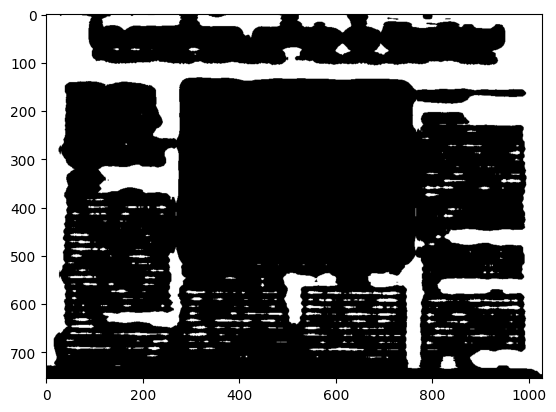

In [44]:
preprocesada = image
plt.imshow(preprocesada)

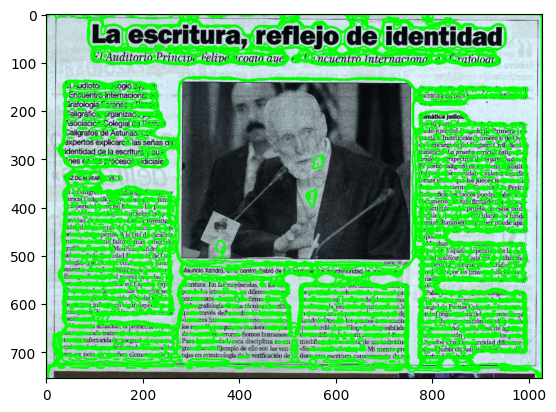

In [45]:
# Detectar contornos
contours, hierarchy = cv2.findContours(preprocesada, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(original_image,contours,-1,(0,255,0),2,cv2.LINE_AA)
plt.imshow(original_image)

In [48]:
# Encontré esto medio falopa para que solo recorte los contornos mayores a cierta
# área. Sino son infinitos recortes
min_contour_area = 5000 # Ajustar mínima área
large_contours = [contour for contour in contours if cv2.contourArea(contour) > min_contour_area]

6


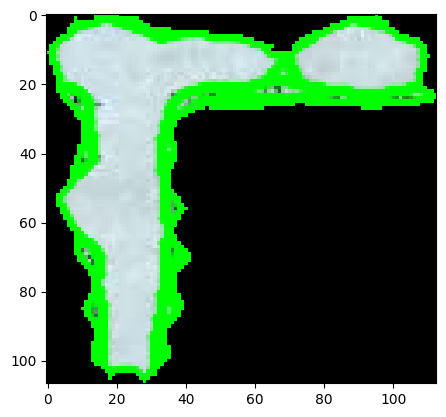

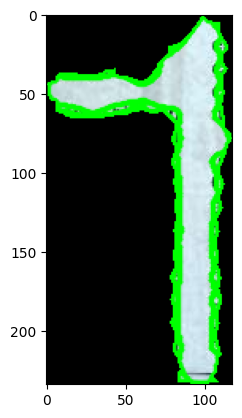

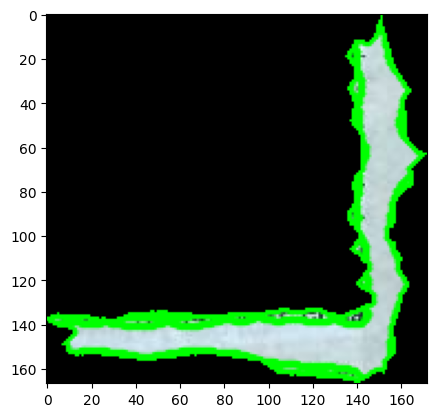

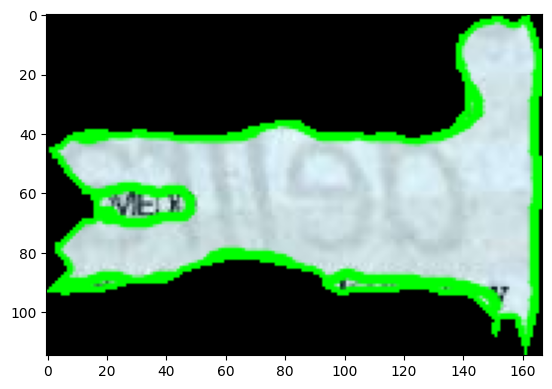

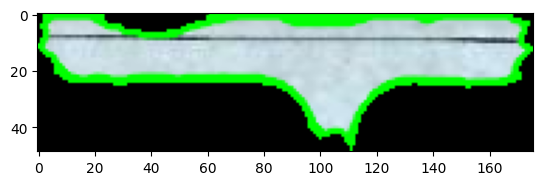

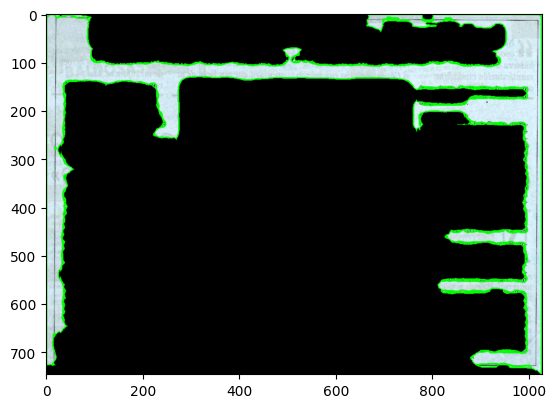

In [49]:
# Crear una máscara negra para cada contorno
masks = []
for contour in large_contours:
    mask = np.zeros(original_image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, (255,255,255), -1)
    masks.append(mask)

# Recortar los contornos más grandes
results = []
for i in range(len(large_contours)):
    result = cv2.bitwise_and(original_image, original_image, mask=masks[i])
    x,y,w,h = cv2.boundingRect(large_contours[i])
    result = result[y:y+h, x:x+w]
    results.append(result)

print(len(large_contours))

# Mostrar resultados
for i in range(len(large_contours)):
    plt.imshow(results[i])
    plt.show()